In [ ]:
from environment import Maze
from agent import Agent
from tqdm import tqdm

def train():
    kernel = 2 # Thickness of the outer wall of the maze (extension)
    start = [1, 1] # Specify the start position
    goal = [4, 4] # Specify the goal position

    """Automatically generate a maze"""
    env = Maze(7, 7) # Specify the size of the maze
    env.set_out_wall() # Surround the maze with walls
    #env.set_inner_wall_boutaosi() # Automatically generate inner walls
    env.set_start_goal(start, goal) # Specify start and goal positions
    env.bg_maze(kernel) # Expand the maze cells by kernel thickness

    """Generate an agent in the environment and train"""
    n = 1 # Number of episode trials
    episode_count = 200 # Number of episodes
    for e in tqdm(range(1, n+1)):
        epsilon = 0.1
        agent = Agent(env.maze)
        env.run(agent, e, episode_count)
    print('Finish')


if __name__ == "__main__":
    train()

C:\Users\souma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' 'S' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' 'G' '0' '1' '0' '1' '1']
 ['1' '1' '0' '1' '0' '0' '0' '1' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '0' '0' '0' '0' '0' '0' '0' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']
 ['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1']]



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.47it/s]

Finish


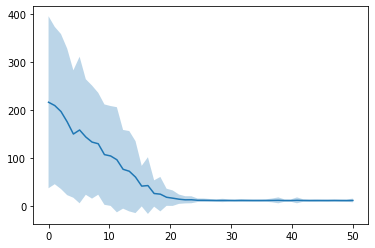

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file as a DataFrame
a_cnt_all = []

for i in range(1, 201):
    df = pd.read_csv('sampleNMQ-'+str(i)+'.csv')
    df = df[df['reward'] == 1]
    df = df['a_cnt']
    df = np.array(df)
    a_cnt_all.append(df)
# Display the DataFrame
# print(np.array(a_cnt_all))
ave_vl = np.mean(a_cnt_all, axis=0)
sigma_vl = np.std(a_cnt_all, axis=0)

x = np.linspace(0, 50)
plt.plot(x, ave_vl)
plt.fill_between(x, ave_vl+sigma_vl, ave_vl-sigma_vl, alpha=0.3)

df = pd.DataFrame(list(zip(ave_vl, ave_vl+sigma_vl, ave_vl-sigma_vl)), columns=['mean', '+', '-'])
df.to_csv('steps_QL.csv', index=False)

### Red：Q-Learning、Green：Q-TileNet

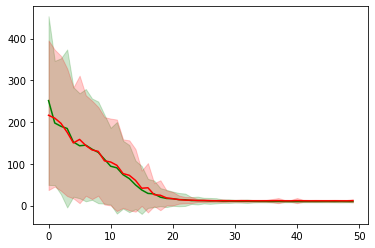

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'steps_QBG.csv'
selected_columns = ['mean']
mean1 = pd.read_csv(file_path, usecols=selected_columns)
selected_columns = ['+']
plus1 = pd.read_csv(file_path, usecols=selected_columns)
selected_columns = ['-']
minus1 = pd.read_csv(file_path, usecols=selected_columns)


file_path = 'steps_QL.csv'  # Path to the CSV file to be read
selected_columns = ['mean']
mean2 = pd.read_csv(file_path, usecols=selected_columns)
selected_columns = ['+']
plus2 = pd.read_csv(file_path, usecols=selected_columns)
selected_columns = ['-']
minus2 = pd.read_csv(file_path, usecols=selected_columns)

x = np.arange(50)
plt.fill_between(x, plus1['+'], minus1['-'], alpha=0.2, color='green')
plt.plot(x, mean1, color='green',label='QBG')
# plt.show()

x = np.arange(50)
plt.fill_between(x, plus2['+'], minus2['-'], alpha=0.2, color='red')
plt.plot(x, mean2, color='red',label='QL')
plt.savefig('LR_QBG_QL_comparison.svg')
plt.show()